In [1]:
# Imports
import matplotlib.pyplot as plt

from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.plotting import MazePlot
import numpy as np
import DQN.agent as agent
import maze_generator.maze_dataset as md
import maze_dataset



In [2]:
dataset = md.Maze_dataset(10,(3,3),'dfs')
maze = dataset[0]

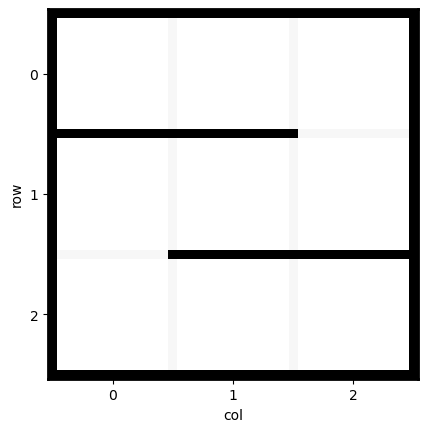

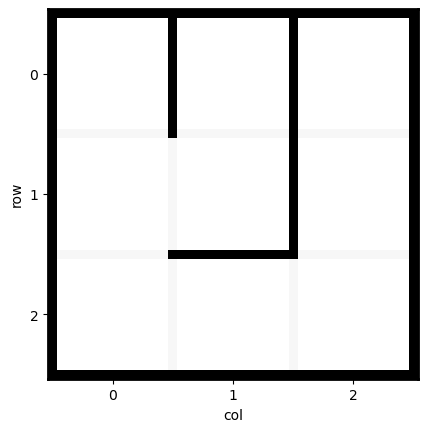

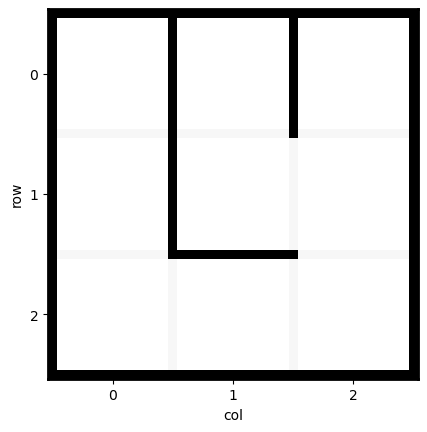

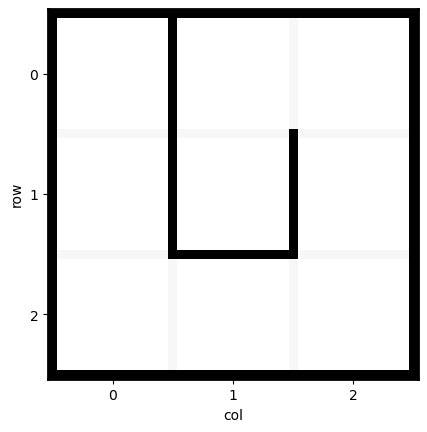

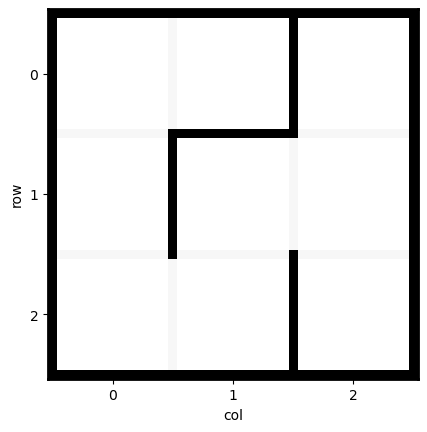

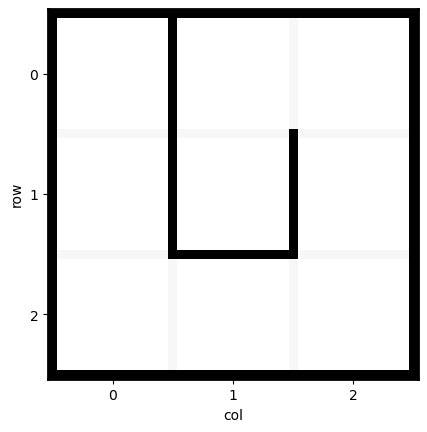

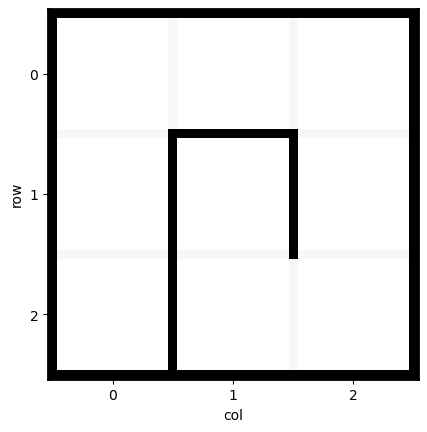

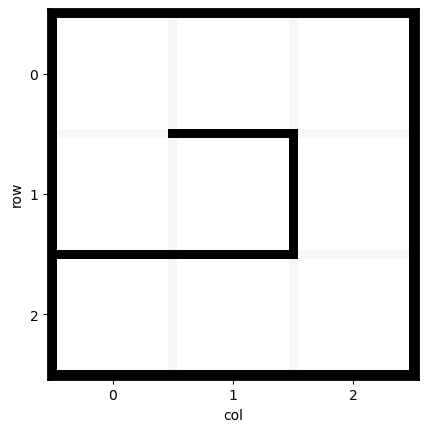

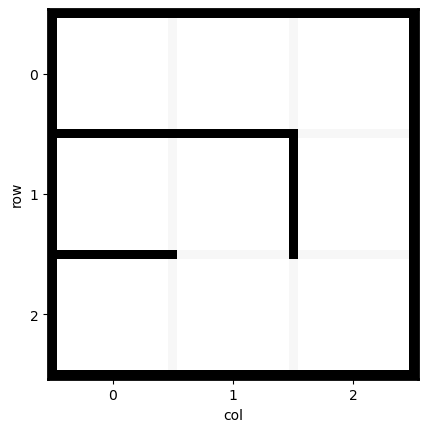

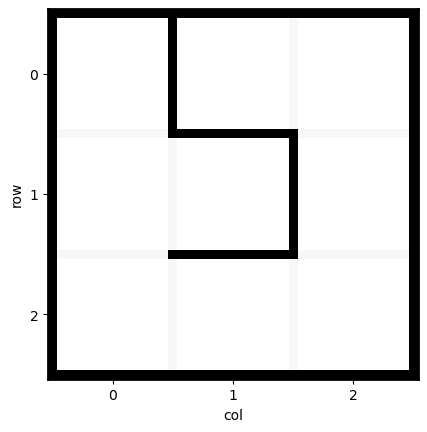

In [3]:
for i in range(len(dataset)):
    dataset.show_maze(i)

In [4]:
mult_agent = agent.CNN_Maze_Agents(3,action_type='full')
mult_agent.run_agent(maze,len_game=50,num_agents=1,epsilon=1,sample_prob=False, init_pos={'agents': [0], 'targets': [8]})

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


[-0.6499999999999999]
[-1.2999999999999998]
[-1.1999999999999997]
[-1.0999999999999996]
[-0.9999999999999997]
[-1.6499999999999995]
[-1.4899999999999995]
[-1.3299999999999996]
[-1.9799999999999995]
[-1.8199999999999996]
[-1.6599999999999997]
[-2.3099999999999996]
[-2.1499999999999995]
[-1.9899999999999995]
[-2.6399999999999997]
[-3.2899999999999996]
[-3.9399999999999995]
[-3.8399999999999994]
[-3.7399999999999993]
[-4.389999999999999]
cumulative reward: [-4.39]


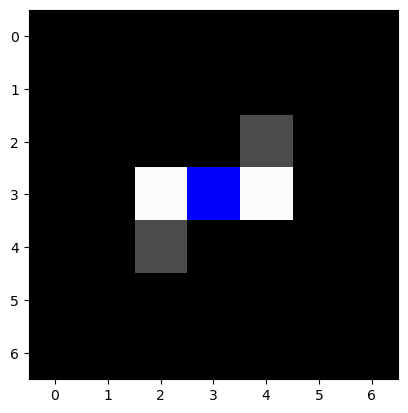

In [5]:
mult_agent.animate_last_replay(0)